Визуализация множества мандельброта

Мы будем использовать функцию, но, вообще, множество мандельброта - это множество таких точек c на комплексной плоскости, для которых рекуррентное соотношение z{n+1}=(z{n})^2 + c при z{0}=0 при бесконечно большом количестве итераций задаёт ограниченную последовательность. (с - комплексное число, имеющее мнимую (iq) и действительную (p) часть в себе).

По вертикальной оси рассмотрим q, а по горизонтальной p


In [0]:
import cupy as cp # загружаем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# инициализиация
pmin, pmax, qmin, qmax = -2.5, 1.5, -2, 2
# пусть c = p + iq и p меняется в диапазоне от pmin до pmax,
# а q меняется в диапазоне от qmin до qmax

ppoints, qpoints = 200, 200
# число точек по горизонтали и вертикали

In [3]:
max_iterations = int(input('Введите число итераций '))
# количество итераций

Введите число итераций 76


In [5]:
infinity_border = int(input('Введите размер окрестности '))
# если ушли на это расстояние, считаем, что ушли на бесконечность

Введите размер окрестности 88


In [0]:
image = cp.zeros((ppoints, qpoints))
# image — это двумерный массив, в котором будет записана наша картинка
# по умолчанию он заполнен нулями

In [0]:
def mandelbrot(pmin, pmax, ppoints, qmin, qmax, qpoints,                         # задаем функцию
               max_iterations=200, infinity_border=10):
    image = cp.zeros((ppoints, qpoints))
    p, q = cp.mgrid[pmin:pmax:(ppoints*1j), qmin:qmax:(qpoints*1j)]
    c = p + 1j*q
    z = cp.zeros_like(c)
    for k in range(max_iterations):
        z = z**2 + c
        mask = (cp.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return cp.asnumpy(-image.T)                                                  # конвертируем Cupy-массив в numpy, который нужен для matplotlib


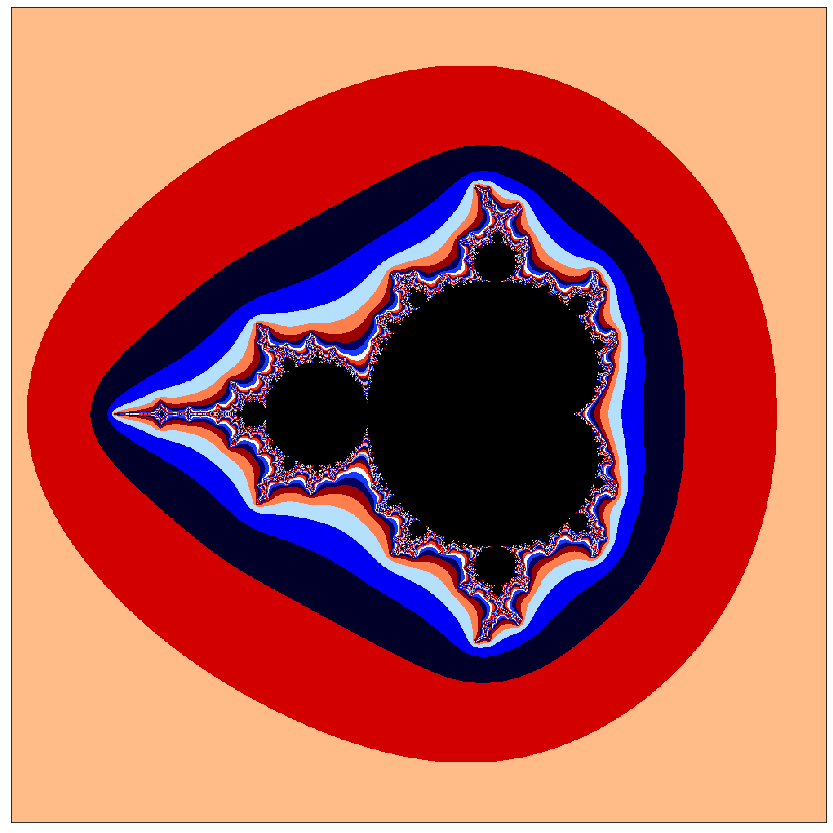

In [10]:
image = mandelbrot(-2.5, 1.5, 1000, -2, 2, 1000, max_iterations, infinity_border) # визуализируем через бибилиотеку matplotlib
plt.figure(figsize=(15, 15))
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap='flag', interpolation='none')


plt.show()